In [41]:
%matplotlib inline
import os
import mne
import pandas as pd
from mne.externals.pymatreader import read_mat
import numpy as np
import matplotlib.pyplot as plt

In [12]:
data_path = 'C:\\Users\\frank\\code\\NeuroErgonomics_Hackathon_2021'
#'/home/dcas/l.darmet/data/contest/comeptition_done'
n_subs = 4
n_sessions = 2
diff = ['MATBeasy', 'MATBmed', 'MATBdiff']
ch_slice = ['F7', 'F5', 'F3', 'F1', 'F2', 'F4', 'F6', 'AF3', 'AFz', 'AF4','FP1', 'FP2', 'FPz']
epochs_data = []

In [26]:
sub_n = 2
session_n = 0
level = diff[0]
sub = 'P{0:02d}'.format(sub_n+1)
sess = f'S{session_n+1}'
path = os.path.join(os.path.join(data_path, sub), sess) + f'/eeg/alldata_sbj{str(sub_n+1).zfill(2)}_sess{session_n+1}_{level}.set'
# Read the epoched data with MNE
epochs = mne.io.read_epochs_eeglab(path, verbose=False)


In [27]:
epochs

Number of events,149
Events,MATBeasy: 149
Time range,0.000 – 1.996 sec
Baseline,off


In [28]:
# You could add some pre-processing here with MNE
# We will just select some channels (mostly frontal ones)
# epochs = epochs.drop_channels(list(set(epochs.ch_names) -set(ch_slice)))
tmp = epochs.get_data()
epochs_data.extend(tmp)

In [29]:
tmp.shape

(149, 61, 500)

In [32]:
session_n = 1
epochs_data = []
labels = []
for lab_idx, level in enumerate(diff):
    sub = 'P{0:02d}'.format(sub_n+1)
    sess = f'S{session_n+1}'
    path = os.path.join(os.path.join(data_path, sub), sess) + f'/eeg/alldata_sbj{str(sub_n+1).zfill(2)}_sess{session_n+1}_{level}.set'
    # Read the epoched data with MNE
    epochs = mne.io.read_epochs_eeglab(path, verbose=False)
    # You could add some pre-processing here with MNE
    # We will just select some channels (mostly frontal ones)
    epochs = epochs.drop_channels(list(set(epochs.ch_names) - set(ch_slice)))

    # Get the data and concatenante with others MATB levels
    tmp = epochs.get_data()
    epochs_data.extend(tmp)
    labels.extend([lab_idx]*len(tmp))

epochs_data = np.array(epochs_data)
labels = np.array(labels)

In [34]:
epochs_data.shape

(447, 10, 500)

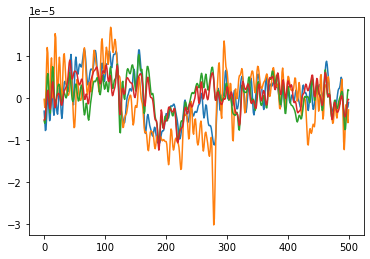

In [54]:
plt.figure()
# plt.plot(epochs_data[0,5,:])
plt.plot(epochs_data[0,0,:])
plt.plot(epochs_data[0,1,:])

plt.plot(epochs_data[0,-2,:])
plt.plot(epochs_data[0,-1,:])